## Question

Prepare rules for the all the data sets

1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values

2) Change the minimum length in apriori algorithm

3) Visulize the obtained rules using different plots

## Movie Dataset

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules

In [4]:
data=pd.read_csv("C:/Users/Shree/Downloads/my_movies.csv")
data.head()

V1       V2             V3          V4     V5  Sixth Sense  \
0  Sixth Sense    LOTR1  Harry Potter1  Green Mile  LOTR2            1   
1    Gladiator  Patriot     Braveheart         NaN    NaN            0   
2        LOTR1    LOTR2            NaN         NaN    NaN            0   
3    Gladiator  Patriot    Sixth Sense         NaN    NaN            1   
4    Gladiator  Patriot    Sixth Sense         NaN    NaN            1   

   Gladiator  LOTR1  Harry Potter1  Patriot  LOTR2  Harry Potter2  LOTR  \
0          0      1              1        0      1              0     0   
1          1      0              0        1      0              0     0   
2          0      1              0        0      1              0     0   
3          1      0              0        1      0              0     0   
4          1      0              0        1      0              0     0   

   Braveheart  Green Mile  
0           0           1  
1           1           0  
2           0           0  
3           0           0  
4           0           0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [6]:
data.shape

(10, 15)

In [7]:
data.describe()

Sixth Sense  Gladiator      LOTR1  Harry Potter1    Patriot      LOTR2  \
count    10.000000  10.000000  10.000000      10.000000  10.000000  10.000000   
mean      0.600000   0.700000   0.200000       0.200000   0.600000   0.200000   
std       0.516398   0.483046   0.421637       0.421637   0.516398   0.421637   
min       0.000000   0.000000   0.000000       0.000000   0.000000   0.000000   
25%       0.000000   0.250000   0.000000       0.000000   0.000000   0.000000   
50%       1.000000   1.000000   0.000000       0.000000   1.000000   0.000000   
75%       1.000000   1.000000   0.000000       0.000000   1.000000   0.000000   
max       1.000000   1.000000   1.000000       1.000000   1.000000   1.000000   

       Harry Potter2       LOTR  Braveheart  Green Mile  
count      10.000000  10.000000   10.000000   10.000000  
mean        0.100000   0.100000    0.100000    0.200000  
std         0.316228   0.316228    0.316228    0.421637  
min         0.000000   0.000000    0.000000    0.000000  
25%         0.000000   0.000000    0.000000    0.000000  
50%         0.000000   0.000000    0.000000    0.000000  
75%         0.000000   0.000000    0.000000    0.000000  
max         1.000000   1.000000    1.000000    1.000000

In [8]:
data.isnull().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

Here first five columns have few null values and objective catgerory. There is no not need in model building so 6th column selected for futher working.


In [9]:
data1=data.iloc[:,5:]
data1.head()

Sixth Sense  Gladiator  LOTR1  Harry Potter1  Patriot  LOTR2  \
0            1          0      1              1        0      1   
1            0          1      0              0        1      0   
2            0          0      1              0        0      1   
3            1          1      0              0        1      0   
4            1          1      0              0        1      0   

   Harry Potter2  LOTR  Braveheart  Green Mile  
0              0     0           0           1  
1              0     0           1           0  
2              0     0           0           0  
3              0     0           0           0  
4              0     0           0           0

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


## Apriori Algotithm

###### Calculated with different support(5%, 10%, 15%, 20%, 25%) and confidence( 50%, 70%, 85%, 90%)

### 1. Support=5% and confidence=90%

In [11]:
iteam1 = apriori(data1, min_support=0.05, use_colnames=True)

C:\Users\Shree\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [12]:
rules1 = association_rules(iteam1,metric="lift",min_threshold=0.9)
rules1

antecedents                                      consequents  \
0      (Sixth Sense)                                      (Gladiator)   
1        (Gladiator)                                    (Sixth Sense)   
2      (Sixth Sense)                                        (Patriot)   
3          (Patriot)                                    (Sixth Sense)   
4      (Sixth Sense)                                           (LOTR)   
..               ...                                              ...   
233     (Green Mile)       (Harry Potter1, Sixth Sense, LOTR2, LOTR1)   
234    (Sixth Sense)        (Green Mile, Harry Potter1, LOTR2, LOTR1)   
235          (LOTR2)  (Harry Potter1, Green Mile, Sixth Sense, LOTR1)   
236          (LOTR1)  (Green Mile, Sixth Sense, LOTR2, Harry Potter1)   
237  (Harry Potter1)          (Green Mile, Sixth Sense, LOTR2, LOTR1)   

     antecedent support  consequent support  support  confidence      lift  \
0                   0.6                 0.7      0.5    0.833333  1.190476   
1                   0.7                 0.6      0.5    0.714286  1.190476   
2                   0.6                 0.6      0.4    0.666667  1.111111   
3                   0.6                 0.6      0.4    0.666667  1.111111   
4                   0.6                 0.1      0.1    0.166667  1.666667   
..                  ...                 ...      ...         ...       ...   
233                 0.2                 0.1      0.1    0.500000  5.000000   
234                 0.6                 0.1      0.1    0.166667  1.666667   
235                 0.2                 0.1      0.1    0.500000  5.000000   
236                 0.2                 0.1      0.1    0.500000  5.000000   
237                 0.2                 0.1      0.1    0.500000  5.000000   

     leverage  conviction  
0        0.08        1.80  
1        0.08        1.40  
2        0.04        1.20  
3        0.04        1.20  
4        0.04        1.08  
..        ...         ...  
233      0.08        1.80  
234      0.04        1.08  
235      0.08        1.80  
236      0.08        1.80  
237      0.08        1.80  

[238 rows x 9 columns]

An leverage value of 0 indicates independence. Range will be [-1 1]
A high conviction value means the consequent is highly depending on the antecedent and range [0 infinity].

In [13]:
rules1.sort_values('lift',ascending=False)

antecedents               consequents  \
202        (Harry Potter1, LOTR1)       (Green Mile, LOTR2)   
188  (Sixth Sense, Harry Potter1)       (Green Mile, LOTR2)   
95        (Green Mile, Gladiator)                    (LOTR)   
130       (Green Mile, Gladiator)       (Sixth Sense, LOTR)   
131           (Sixth Sense, LOTR)   (Green Mile, Gladiator)   
..                            ...                       ...   
35                  (Sixth Sense)      (Patriot, Gladiator)   
3                       (Patriot)             (Sixth Sense)   
2                   (Sixth Sense)                 (Patriot)   
45       (Sixth Sense, Gladiator)              (Green Mile)   
46                   (Green Mile)  (Sixth Sense, Gladiator)   

     antecedent support  consequent support  support  confidence       lift  \
202                 0.1                 0.1      0.1    1.000000  10.000000   
188                 0.1                 0.1      0.1    1.000000  10.000000   
95                  0.1                 0.1      0.1    1.000000  10.000000   
130                 0.1                 0.1      0.1    1.000000  10.000000   
131                 0.1                 0.1      0.1    1.000000  10.000000   
..                  ...                 ...      ...         ...        ...   
35                  0.6                 0.6      0.4    0.666667   1.111111   
3                   0.6                 0.6      0.4    0.666667   1.111111   
2                   0.6                 0.6      0.4    0.666667   1.111111   
45                  0.5                 0.2      0.1    0.200000   1.000000   
46                  0.2                 0.5      0.1    0.500000   1.000000   

     leverage  conviction  
202      0.09         inf  
188      0.09         inf  
95       0.09         inf  
130      0.09         inf  
131      0.09         inf  
..        ...         ...  
35       0.04         1.2  
3        0.04         1.2  
2        0.04         1.2  
45       0.00         1.0  
46       0.00         1.0  

[238 rows x 9 columns]

In [14]:
rules1[rules1.lift>1]

antecedents                                      consequents  \
0      (Sixth Sense)                                      (Gladiator)   
1        (Gladiator)                                    (Sixth Sense)   
2      (Sixth Sense)                                        (Patriot)   
3          (Patriot)                                    (Sixth Sense)   
4      (Sixth Sense)                                           (LOTR)   
..               ...                                              ...   
233     (Green Mile)       (Harry Potter1, Sixth Sense, LOTR2, LOTR1)   
234    (Sixth Sense)        (Green Mile, Harry Potter1, LOTR2, LOTR1)   
235          (LOTR2)  (Harry Potter1, Green Mile, Sixth Sense, LOTR1)   
236          (LOTR1)  (Green Mile, Sixth Sense, LOTR2, Harry Potter1)   
237  (Harry Potter1)          (Green Mile, Sixth Sense, LOTR2, LOTR1)   

     antecedent support  consequent support  support  confidence      lift  \
0                   0.6                 0.7      0.5    0.833333  1.190476   
1                   0.7                 0.6      0.5    0.714286  1.190476   
2                   0.6                 0.6      0.4    0.666667  1.111111   
3                   0.6                 0.6      0.4    0.666667  1.111111   
4                   0.6                 0.1      0.1    0.166667  1.666667   
..                  ...                 ...      ...         ...       ...   
233                 0.2                 0.1      0.1    0.500000  5.000000   
234                 0.6                 0.1      0.1    0.166667  1.666667   
235                 0.2                 0.1      0.1    0.500000  5.000000   
236                 0.2                 0.1      0.1    0.500000  5.000000   
237                 0.2                 0.1      0.1    0.500000  5.000000   

     leverage  conviction  
0        0.08        1.80  
1        0.08        1.40  
2        0.04        1.20  
3        0.04        1.20  
4        0.04        1.08  
..        ...         ...  
233      0.08        1.80  
234      0.04        1.08  
235      0.08        1.80  
236      0.08        1.80  
237      0.08        1.80  

[236 rows x 9 columns]

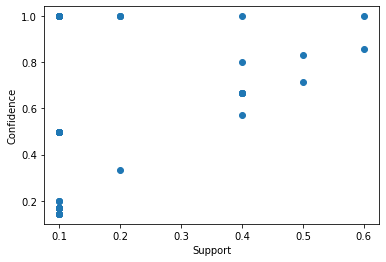

In [15]:
plt.scatter(rules1['support'],rules1['confidence'])
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.show()

### 2. Support=10% and confidence=85%

In [16]:
iteam2 = apriori(data1, min_support=0.10, use_colnames=True)
iteam2

C:\Users\Shree\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                                           itemsets
0       0.6                                      (Sixth Sense)
1       0.7                                        (Gladiator)
2       0.2                                            (LOTR1)
3       0.2                                    (Harry Potter1)
4       0.6                                          (Patriot)
5       0.2                                            (LOTR2)
6       0.1                                    (Harry Potter2)
7       0.1                                             (LOTR)
8       0.1                                       (Braveheart)
9       0.2                                       (Green Mile)
10      0.5                           (Sixth Sense, Gladiator)
11      0.1                               (Sixth Sense, LOTR1)
12      0.1                       (Sixth Sense, Harry Potter1)
13      0.4                             (Sixth Sense, Patriot)
14      0.1                               (Sixth Sense, LOTR2)
15      0.1                                (Sixth Sense, LOTR)
16      0.2                          (Green Mile, Sixth Sense)
17      0.6                               (Patriot, Gladiator)
18      0.1                                  (LOTR, Gladiator)
19      0.1                            (Braveheart, Gladiator)
20      0.1                            (Green Mile, Gladiator)
21      0.1                             (Harry Potter1, LOTR1)
22      0.2                                     (LOTR2, LOTR1)
23      0.1                                (Green Mile, LOTR1)
24      0.1                             (Harry Potter1, LOTR2)
25      0.1                     (Harry Potter2, Harry Potter1)
26      0.1                        (Green Mile, Harry Potter1)
27      0.1                              (Braveheart, Patriot)
28      0.1                                (Green Mile, LOTR2)
29      0.1                                 (Green Mile, LOTR)
30      0.4                  (Sixth Sense, Patriot, Gladiator)
31      0.1                     (Sixth Sense, LOTR, Gladiator)
32      0.1               (Green Mile, Sixth Sense, Gladiator)
33      0.1                (Harry Potter1, Sixth Sense, LOTR1)
34      0.1                        (Sixth Sense, LOTR2, LOTR1)
35      0.1                   (Green Mile, Sixth Sense, LOTR1)
36      0.1                (Sixth Sense, LOTR2, Harry Potter1)
37      0.1           (Green Mile, Sixth Sense, Harry Potter1)
38      0.1                   (Green Mile, Sixth Sense, LOTR2)
39      0.1                    (Green Mile, Sixth Sense, LOTR)
40      0.1                   (Braveheart, Patriot, Gladiator)
41      0.1                      (Green Mile, LOTR, Gladiator)
42      0.1                      (Harry Potter1, LOTR2, LOTR1)
43      0.1                 (Green Mile, Harry Potter1, LOTR1)
44      0.1                         (Green Mile, LOTR2, LOTR1)
45      0.1                 (Green Mile, Harry Potter1, LOTR2)
46      0.1         (Green Mile, Sixth Sense, LOTR, Gladiator)
47      0.1         (Harry Potter1, Sixth Sense, LOTR2, LOTR1)
48      0.1    (Harry Potter1, Green Mile, Sixth Sense, LOTR1)
49      0.1            (Green Mile, Sixth Sense, LOTR2, LOTR1)
50      0.1    (Green Mile, Sixth Sense, LOTR2, Harry Potter1)
51      0.1          (Green Mile, Harry Potter1, LOTR2, LOTR1)
52      0.1  (Green Mile, Sixth Sense, LOTR2, LOTR1, Harry ...

In [17]:
rules2=association_rules(iteam2,metric='lift',min_threshold=0.85)
rules2

antecedents                                      consequents  \
0      (Sixth Sense)                                      (Gladiator)   
1        (Gladiator)                                    (Sixth Sense)   
2      (Sixth Sense)                                        (Patriot)   
3          (Patriot)                                    (Sixth Sense)   
4      (Sixth Sense)                                           (LOTR)   
..               ...                                              ...   
233     (Green Mile)       (Harry Potter1, Sixth Sense, LOTR2, LOTR1)   
234    (Sixth Sense)        (Green Mile, Harry Potter1, LOTR2, LOTR1)   
235          (LOTR2)  (Harry Potter1, Green Mile, Sixth Sense, LOTR1)   
236          (LOTR1)  (Green Mile, Sixth Sense, LOTR2, Harry Potter1)   
237  (Harry Potter1)          (Green Mile, Sixth Sense, LOTR2, LOTR1)   

     antecedent support  consequent support  support  confidence      lift  \
0                   0.6                 0.7      0.5    0.833333  1.190476   
1                   0.7                 0.6      0.5    0.714286  1.190476   
2                   0.6                 0.6      0.4    0.666667  1.111111   
3                   0.6                 0.6      0.4    0.666667  1.111111   
4                   0.6                 0.1      0.1    0.166667  1.666667   
..                  ...                 ...      ...         ...       ...   
233                 0.2                 0.1      0.1    0.500000  5.000000   
234                 0.6                 0.1      0.1    0.166667  1.666667   
235                 0.2                 0.1      0.1    0.500000  5.000000   
236                 0.2                 0.1      0.1    0.500000  5.000000   
237                 0.2                 0.1      0.1    0.500000  5.000000   

     leverage  conviction  
0        0.08        1.80  
1        0.08        1.40  
2        0.04        1.20  
3        0.04        1.20  
4        0.04        1.08  
..        ...         ...  
233      0.08        1.80  
234      0.04        1.08  
235      0.08        1.80  
236      0.08        1.80  
237      0.08        1.80  

[238 rows x 9 columns]

In [18]:
rules2.sort_values('lift',ascending=False)

antecedents               consequents  \
202        (Harry Potter1, LOTR1)       (Green Mile, LOTR2)   
188  (Sixth Sense, Harry Potter1)       (Green Mile, LOTR2)   
95        (Green Mile, Gladiator)                    (LOTR)   
130       (Green Mile, Gladiator)       (Sixth Sense, LOTR)   
131           (Sixth Sense, LOTR)   (Green Mile, Gladiator)   
..                            ...                       ...   
35                  (Sixth Sense)      (Patriot, Gladiator)   
3                       (Patriot)             (Sixth Sense)   
2                   (Sixth Sense)                 (Patriot)   
45       (Sixth Sense, Gladiator)              (Green Mile)   
46                   (Green Mile)  (Sixth Sense, Gladiator)   

     antecedent support  consequent support  support  confidence       lift  \
202                 0.1                 0.1      0.1    1.000000  10.000000   
188                 0.1                 0.1      0.1    1.000000  10.000000   
95                  0.1                 0.1      0.1    1.000000  10.000000   
130                 0.1                 0.1      0.1    1.000000  10.000000   
131                 0.1                 0.1      0.1    1.000000  10.000000   
..                  ...                 ...      ...         ...        ...   
35                  0.6                 0.6      0.4    0.666667   1.111111   
3                   0.6                 0.6      0.4    0.666667   1.111111   
2                   0.6                 0.6      0.4    0.666667   1.111111   
45                  0.5                 0.2      0.1    0.200000   1.000000   
46                  0.2                 0.5      0.1    0.500000   1.000000   

     leverage  conviction  
202      0.09         inf  
188      0.09         inf  
95       0.09         inf  
130      0.09         inf  
131      0.09         inf  
..        ...         ...  
35       0.04         1.2  
3        0.04         1.2  
2        0.04         1.2  
45       0.00         1.0  
46       0.00         1.0  

[238 rows x 9 columns]

In [19]:
rules2[rules2.lift>1]

antecedents                                      consequents  \
0      (Sixth Sense)                                      (Gladiator)   
1        (Gladiator)                                    (Sixth Sense)   
2      (Sixth Sense)                                        (Patriot)   
3          (Patriot)                                    (Sixth Sense)   
4      (Sixth Sense)                                           (LOTR)   
..               ...                                              ...   
233     (Green Mile)       (Harry Potter1, Sixth Sense, LOTR2, LOTR1)   
234    (Sixth Sense)        (Green Mile, Harry Potter1, LOTR2, LOTR1)   
235          (LOTR2)  (Harry Potter1, Green Mile, Sixth Sense, LOTR1)   
236          (LOTR1)  (Green Mile, Sixth Sense, LOTR2, Harry Potter1)   
237  (Harry Potter1)          (Green Mile, Sixth Sense, LOTR2, LOTR1)   

     antecedent support  consequent support  support  confidence      lift  \
0                   0.6                 0.7      0.5    0.833333  1.190476   
1                   0.7                 0.6      0.5    0.714286  1.190476   
2                   0.6                 0.6      0.4    0.666667  1.111111   
3                   0.6                 0.6      0.4    0.666667  1.111111   
4                   0.6                 0.1      0.1    0.166667  1.666667   
..                  ...                 ...      ...         ...       ...   
233                 0.2                 0.1      0.1    0.500000  5.000000   
234                 0.6                 0.1      0.1    0.166667  1.666667   
235                 0.2                 0.1      0.1    0.500000  5.000000   
236                 0.2                 0.1      0.1    0.500000  5.000000   
237                 0.2                 0.1      0.1    0.500000  5.000000   

     leverage  conviction  
0        0.08        1.80  
1        0.08        1.40  
2        0.04        1.20  
3        0.04        1.20  
4        0.04        1.08  
..        ...         ...  
233      0.08        1.80  
234      0.04        1.08  
235      0.08        1.80  
236      0.08        1.80  
237      0.08        1.80  

[236 rows x 9 columns]

###### Here 10 row's lift values are less than 1 

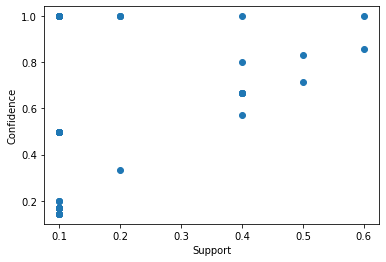

In [20]:
plt.scatter(rules2['support'],rules2['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

### 3. Support=15% and confidence=70%

In [21]:
iteam3 = apriori(data1, min_support=0.15, use_colnames=True)
iteam3

C:\Users\Shree\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                           itemsets
0       0.6                      (Sixth Sense)
1       0.7                        (Gladiator)
2       0.2                            (LOTR1)
3       0.2                    (Harry Potter1)
4       0.6                          (Patriot)
5       0.2                            (LOTR2)
6       0.2                       (Green Mile)
7       0.5           (Sixth Sense, Gladiator)
8       0.4             (Sixth Sense, Patriot)
9       0.2          (Green Mile, Sixth Sense)
10      0.6               (Patriot, Gladiator)
11      0.2                     (LOTR2, LOTR1)
12      0.4  (Sixth Sense, Patriot, Gladiator)

In [22]:
rules3=association_rules(iteam3,metric='lift',min_threshold=0.7)
rules3

antecedents               consequents  antecedent support  \
0              (Sixth Sense)               (Gladiator)                 0.6   
1                (Gladiator)             (Sixth Sense)                 0.7   
2              (Sixth Sense)                 (Patriot)                 0.6   
3                  (Patriot)             (Sixth Sense)                 0.6   
4               (Green Mile)             (Sixth Sense)                 0.2   
5              (Sixth Sense)              (Green Mile)                 0.6   
6                  (Patriot)               (Gladiator)                 0.6   
7                (Gladiator)                 (Patriot)                 0.7   
8                    (LOTR2)                   (LOTR1)                 0.2   
9                    (LOTR1)                   (LOTR2)                 0.2   
10    (Sixth Sense, Patriot)               (Gladiator)                 0.4   
11  (Sixth Sense, Gladiator)                 (Patriot)                 0.5   
12      (Patriot, Gladiator)             (Sixth Sense)                 0.6   
13             (Sixth Sense)      (Patriot, Gladiator)                 0.6   
14                 (Patriot)  (Sixth Sense, Gladiator)                 0.6   
15               (Gladiator)    (Sixth Sense, Patriot)                 0.7   

    consequent support  support  confidence      lift  leverage  conviction  
0                  0.7      0.5    0.833333  1.190476      0.08         1.8  
1                  0.6      0.5    0.714286  1.190476      0.08         1.4  
2                  0.6      0.4    0.666667  1.111111      0.04         1.2  
3                  0.6      0.4    0.666667  1.111111      0.04         1.2  
4                  0.6      0.2    1.000000  1.666667      0.08         inf  
5                  0.2      0.2    0.333333  1.666667      0.08         1.2  
6                  0.7      0.6    1.000000  1.428571      0.18         inf  
7                  0.6      0.6    0.857143  1.428571      0.18         2.8  
8                  0.2      0.2    1.000000  5.000000      0.16         inf  
9                  0.2      0.2    1.000000  5.000000      0.16         inf  
10                 0.7      0.4    1.000000  1.428571      0.12         inf  
11                 0.6      0.4    0.800000  1.333333      0.10         2.0  
12                 0.6      0.4    0.666667  1.111111      0.04         1.2  
13                 0.6      0.4    0.666667  1.111111      0.04         1.2  
14                 0.5      0.4    0.666667  1.333333      0.10         1.5  
15                 0.4      0.4    0.571429  1.428571      0.12         1.4

In [23]:
rules3.sort_values('lift',ascending=False)

antecedents               consequents  antecedent support  \
8                    (LOTR2)                   (LOTR1)                 0.2   
9                    (LOTR1)                   (LOTR2)                 0.2   
4               (Green Mile)             (Sixth Sense)                 0.2   
5              (Sixth Sense)              (Green Mile)                 0.6   
7                (Gladiator)                 (Patriot)                 0.7   
6                  (Patriot)               (Gladiator)                 0.6   
10    (Sixth Sense, Patriot)               (Gladiator)                 0.4   
15               (Gladiator)    (Sixth Sense, Patriot)                 0.7   
11  (Sixth Sense, Gladiator)                 (Patriot)                 0.5   
14                 (Patriot)  (Sixth Sense, Gladiator)                 0.6   
0              (Sixth Sense)               (Gladiator)                 0.6   
1                (Gladiator)             (Sixth Sense)                 0.7   
2              (Sixth Sense)                 (Patriot)                 0.6   
3                  (Patriot)             (Sixth Sense)                 0.6   
12      (Patriot, Gladiator)             (Sixth Sense)                 0.6   
13             (Sixth Sense)      (Patriot, Gladiator)                 0.6   

    consequent support  support  confidence      lift  leverage  conviction  
8                  0.2      0.2    1.000000  5.000000      0.16         inf  
9                  0.2      0.2    1.000000  5.000000      0.16         inf  
4                  0.6      0.2    1.000000  1.666667      0.08         inf  
5                  0.2      0.2    0.333333  1.666667      0.08         1.2  
7                  0.6      0.6    0.857143  1.428571      0.18         2.8  
6                  0.7      0.6    1.000000  1.428571      0.18         inf  
10                 0.7      0.4    1.000000  1.428571      0.12         inf  
15                 0.4      0.4    0.571429  1.428571      0.12         1.4  
11                 0.6      0.4    0.800000  1.333333      0.10         2.0  
14                 0.5      0.4    0.666667  1.333333      0.10         1.5  
0                  0.7      0.5    0.833333  1.190476      0.08         1.8  
1                  0.6      0.5    0.714286  1.190476      0.08         1.4  
2                  0.6      0.4    0.666667  1.111111      0.04         1.2  
3                  0.6      0.4    0.666667  1.111111      0.04         1.2  
12                 0.6      0.4    0.666667  1.111111      0.04         1.2  
13                 0.6      0.4    0.666667  1.111111      0.04         1.2

In [24]:
rules3[rules3.lift>1]

antecedents               consequents  antecedent support  \
0              (Sixth Sense)               (Gladiator)                 0.6   
1                (Gladiator)             (Sixth Sense)                 0.7   
2              (Sixth Sense)                 (Patriot)                 0.6   
3                  (Patriot)             (Sixth Sense)                 0.6   
4               (Green Mile)             (Sixth Sense)                 0.2   
5              (Sixth Sense)              (Green Mile)                 0.6   
6                  (Patriot)               (Gladiator)                 0.6   
7                (Gladiator)                 (Patriot)                 0.7   
8                    (LOTR2)                   (LOTR1)                 0.2   
9                    (LOTR1)                   (LOTR2)                 0.2   
10    (Sixth Sense, Patriot)               (Gladiator)                 0.4   
11  (Sixth Sense, Gladiator)                 (Patriot)                 0.5   
12      (Patriot, Gladiator)             (Sixth Sense)                 0.6   
13             (Sixth Sense)      (Patriot, Gladiator)                 0.6   
14                 (Patriot)  (Sixth Sense, Gladiator)                 0.6   
15               (Gladiator)    (Sixth Sense, Patriot)                 0.7   

    consequent support  support  confidence      lift  leverage  conviction  
0                  0.7      0.5    0.833333  1.190476      0.08         1.8  
1                  0.6      0.5    0.714286  1.190476      0.08         1.4  
2                  0.6      0.4    0.666667  1.111111      0.04         1.2  
3                  0.6      0.4    0.666667  1.111111      0.04         1.2  
4                  0.6      0.2    1.000000  1.666667      0.08         inf  
5                  0.2      0.2    0.333333  1.666667      0.08         1.2  
6                  0.7      0.6    1.000000  1.428571      0.18         inf  
7                  0.6      0.6    0.857143  1.428571      0.18         2.8  
8                  0.2      0.2    1.000000  5.000000      0.16         inf  
9                  0.2      0.2    1.000000  5.000000      0.16         inf  
10                 0.7      0.4    1.000000  1.428571      0.12         inf  
11                 0.6      0.4    0.800000  1.333333      0.10         2.0  
12                 0.6      0.4    0.666667  1.111111      0.04         1.2  
13                 0.6      0.4    0.666667  1.111111      0.04         1.2  
14                 0.5      0.4    0.666667  1.333333      0.10         1.5  
15                 0.4      0.4    0.571429  1.428571      0.12         1.4

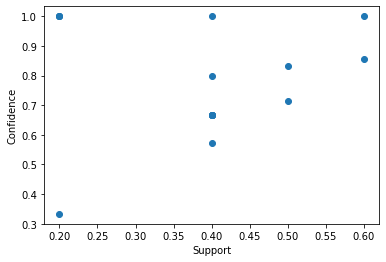

In [25]:
plt.scatter(rules3['support'],rules3['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

### 4. Support=20% and confidence=50%

In [26]:
iteam4 = apriori(data1, min_support=0.20, use_colnames=True)
iteam4

C:\Users\Shree\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                           itemsets
0       0.6                      (Sixth Sense)
1       0.7                        (Gladiator)
2       0.2                            (LOTR1)
3       0.2                    (Harry Potter1)
4       0.6                          (Patriot)
5       0.2                            (LOTR2)
6       0.2                       (Green Mile)
7       0.5           (Sixth Sense, Gladiator)
8       0.4             (Sixth Sense, Patriot)
9       0.2          (Green Mile, Sixth Sense)
10      0.6               (Patriot, Gladiator)
11      0.2                     (LOTR2, LOTR1)
12      0.4  (Sixth Sense, Patriot, Gladiator)

In [27]:
rules4=association_rules(iteam4,metric='lift',min_threshold=0.5)
rules4

antecedents               consequents  antecedent support  \
0              (Sixth Sense)               (Gladiator)                 0.6   
1                (Gladiator)             (Sixth Sense)                 0.7   
2              (Sixth Sense)                 (Patriot)                 0.6   
3                  (Patriot)             (Sixth Sense)                 0.6   
4               (Green Mile)             (Sixth Sense)                 0.2   
5              (Sixth Sense)              (Green Mile)                 0.6   
6                  (Patriot)               (Gladiator)                 0.6   
7                (Gladiator)                 (Patriot)                 0.7   
8                    (LOTR2)                   (LOTR1)                 0.2   
9                    (LOTR1)                   (LOTR2)                 0.2   
10    (Sixth Sense, Patriot)               (Gladiator)                 0.4   
11  (Sixth Sense, Gladiator)                 (Patriot)                 0.5   
12      (Patriot, Gladiator)             (Sixth Sense)                 0.6   
13             (Sixth Sense)      (Patriot, Gladiator)                 0.6   
14                 (Patriot)  (Sixth Sense, Gladiator)                 0.6   
15               (Gladiator)    (Sixth Sense, Patriot)                 0.7   

    consequent support  support  confidence      lift  leverage  conviction  
0                  0.7      0.5    0.833333  1.190476      0.08         1.8  
1                  0.6      0.5    0.714286  1.190476      0.08         1.4  
2                  0.6      0.4    0.666667  1.111111      0.04         1.2  
3                  0.6      0.4    0.666667  1.111111      0.04         1.2  
4                  0.6      0.2    1.000000  1.666667      0.08         inf  
5                  0.2      0.2    0.333333  1.666667      0.08         1.2  
6                  0.7      0.6    1.000000  1.428571      0.18         inf  
7                  0.6      0.6    0.857143  1.428571      0.18         2.8  
8                  0.2      0.2    1.000000  5.000000      0.16         inf  
9                  0.2      0.2    1.000000  5.000000      0.16         inf  
10                 0.7      0.4    1.000000  1.428571      0.12         inf  
11                 0.6      0.4    0.800000  1.333333      0.10         2.0  
12                 0.6      0.4    0.666667  1.111111      0.04         1.2  
13                 0.6      0.4    0.666667  1.111111      0.04         1.2  
14                 0.5      0.4    0.666667  1.333333      0.10         1.5  
15                 0.4      0.4    0.571429  1.428571      0.12         1.4

In [28]:
rules4.sort_values('lift',ascending=False)

antecedents               consequents  antecedent support  \
8                    (LOTR2)                   (LOTR1)                 0.2   
9                    (LOTR1)                   (LOTR2)                 0.2   
4               (Green Mile)             (Sixth Sense)                 0.2   
5              (Sixth Sense)              (Green Mile)                 0.6   
7                (Gladiator)                 (Patriot)                 0.7   
6                  (Patriot)               (Gladiator)                 0.6   
10    (Sixth Sense, Patriot)               (Gladiator)                 0.4   
15               (Gladiator)    (Sixth Sense, Patriot)                 0.7   
11  (Sixth Sense, Gladiator)                 (Patriot)                 0.5   
14                 (Patriot)  (Sixth Sense, Gladiator)                 0.6   
0              (Sixth Sense)               (Gladiator)                 0.6   
1                (Gladiator)             (Sixth Sense)                 0.7   
2              (Sixth Sense)                 (Patriot)                 0.6   
3                  (Patriot)             (Sixth Sense)                 0.6   
12      (Patriot, Gladiator)             (Sixth Sense)                 0.6   
13             (Sixth Sense)      (Patriot, Gladiator)                 0.6   

    consequent support  support  confidence      lift  leverage  conviction  
8                  0.2      0.2    1.000000  5.000000      0.16         inf  
9                  0.2      0.2    1.000000  5.000000      0.16         inf  
4                  0.6      0.2    1.000000  1.666667      0.08         inf  
5                  0.2      0.2    0.333333  1.666667      0.08         1.2  
7                  0.6      0.6    0.857143  1.428571      0.18         2.8  
6                  0.7      0.6    1.000000  1.428571      0.18         inf  
10                 0.7      0.4    1.000000  1.428571      0.12         inf  
15                 0.4      0.4    0.571429  1.428571      0.12         1.4  
11                 0.6      0.4    0.800000  1.333333      0.10         2.0  
14                 0.5      0.4    0.666667  1.333333      0.10         1.5  
0                  0.7      0.5    0.833333  1.190476      0.08         1.8  
1                  0.6      0.5    0.714286  1.190476      0.08         1.4  
2                  0.6      0.4    0.666667  1.111111      0.04         1.2  
3                  0.6      0.4    0.666667  1.111111      0.04         1.2  
12                 0.6      0.4    0.666667  1.111111      0.04         1.2  
13                 0.6      0.4    0.666667  1.111111      0.04         1.2

In [29]:
rules4[rules4.lift>1]

antecedents               consequents  antecedent support  \
0              (Sixth Sense)               (Gladiator)                 0.6   
1                (Gladiator)             (Sixth Sense)                 0.7   
2              (Sixth Sense)                 (Patriot)                 0.6   
3                  (Patriot)             (Sixth Sense)                 0.6   
4               (Green Mile)             (Sixth Sense)                 0.2   
5              (Sixth Sense)              (Green Mile)                 0.6   
6                  (Patriot)               (Gladiator)                 0.6   
7                (Gladiator)                 (Patriot)                 0.7   
8                    (LOTR2)                   (LOTR1)                 0.2   
9                    (LOTR1)                   (LOTR2)                 0.2   
10    (Sixth Sense, Patriot)               (Gladiator)                 0.4   
11  (Sixth Sense, Gladiator)                 (Patriot)                 0.5   
12      (Patriot, Gladiator)             (Sixth Sense)                 0.6   
13             (Sixth Sense)      (Patriot, Gladiator)                 0.6   
14                 (Patriot)  (Sixth Sense, Gladiator)                 0.6   
15               (Gladiator)    (Sixth Sense, Patriot)                 0.7   

    consequent support  support  confidence      lift  leverage  conviction  
0                  0.7      0.5    0.833333  1.190476      0.08         1.8  
1                  0.6      0.5    0.714286  1.190476      0.08         1.4  
2                  0.6      0.4    0.666667  1.111111      0.04         1.2  
3                  0.6      0.4    0.666667  1.111111      0.04         1.2  
4                  0.6      0.2    1.000000  1.666667      0.08         inf  
5                  0.2      0.2    0.333333  1.666667      0.08         1.2  
6                  0.7      0.6    1.000000  1.428571      0.18         inf  
7                  0.6      0.6    0.857143  1.428571      0.18         2.8  
8                  0.2      0.2    1.000000  5.000000      0.16         inf  
9                  0.2      0.2    1.000000  5.000000      0.16         inf  
10                 0.7      0.4    1.000000  1.428571      0.12         inf  
11                 0.6      0.4    0.800000  1.333333      0.10         2.0  
12                 0.6      0.4    0.666667  1.111111      0.04         1.2  
13                 0.6      0.4    0.666667  1.111111      0.04         1.2  
14                 0.5      0.4    0.666667  1.333333      0.10         1.5  
15                 0.4      0.4    0.571429  1.428571      0.12         1.4

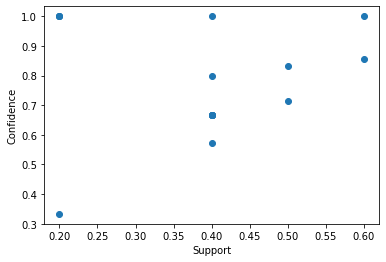

In [30]:
plt.scatter(rules4['support'],rules4['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

### 5. Support=25% and confidence=50%

In [31]:
iteam5 = apriori(data1, min_support=0.25, use_colnames=True)
iteam5

C:\Users\Shree\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                           itemsets
0      0.6                      (Sixth Sense)
1      0.7                        (Gladiator)
2      0.6                          (Patriot)
3      0.5           (Sixth Sense, Gladiator)
4      0.4             (Sixth Sense, Patriot)
5      0.6               (Patriot, Gladiator)
6      0.4  (Sixth Sense, Patriot, Gladiator)

In [32]:
rules5=association_rules(iteam5,metric='lift',min_threshold=0.5)
rules5

antecedents               consequents  antecedent support  \
0              (Sixth Sense)               (Gladiator)                 0.6   
1                (Gladiator)             (Sixth Sense)                 0.7   
2              (Sixth Sense)                 (Patriot)                 0.6   
3                  (Patriot)             (Sixth Sense)                 0.6   
4                  (Patriot)               (Gladiator)                 0.6   
5                (Gladiator)                 (Patriot)                 0.7   
6     (Sixth Sense, Patriot)               (Gladiator)                 0.4   
7   (Sixth Sense, Gladiator)                 (Patriot)                 0.5   
8       (Patriot, Gladiator)             (Sixth Sense)                 0.6   
9              (Sixth Sense)      (Patriot, Gladiator)                 0.6   
10                 (Patriot)  (Sixth Sense, Gladiator)                 0.6   
11               (Gladiator)    (Sixth Sense, Patriot)                 0.7   

    consequent support  support  confidence      lift  leverage  conviction  
0                  0.7      0.5    0.833333  1.190476      0.08         1.8  
1                  0.6      0.5    0.714286  1.190476      0.08         1.4  
2                  0.6      0.4    0.666667  1.111111      0.04         1.2  
3                  0.6      0.4    0.666667  1.111111      0.04         1.2  
4                  0.7      0.6    1.000000  1.428571      0.18         inf  
5                  0.6      0.6    0.857143  1.428571      0.18         2.8  
6                  0.7      0.4    1.000000  1.428571      0.12         inf  
7                  0.6      0.4    0.800000  1.333333      0.10         2.0  
8                  0.6      0.4    0.666667  1.111111      0.04         1.2  
9                  0.6      0.4    0.666667  1.111111      0.04         1.2  
10                 0.5      0.4    0.666667  1.333333      0.10         1.5  
11                 0.4      0.4    0.571429  1.428571      0.12         1.4

In [33]:
rules5.sort_values('lift',ascending=False)

antecedents               consequents  antecedent support  \
5                (Gladiator)                 (Patriot)                 0.7   
4                  (Patriot)               (Gladiator)                 0.6   
6     (Sixth Sense, Patriot)               (Gladiator)                 0.4   
11               (Gladiator)    (Sixth Sense, Patriot)                 0.7   
7   (Sixth Sense, Gladiator)                 (Patriot)                 0.5   
10                 (Patriot)  (Sixth Sense, Gladiator)                 0.6   
0              (Sixth Sense)               (Gladiator)                 0.6   
1                (Gladiator)             (Sixth Sense)                 0.7   
2              (Sixth Sense)                 (Patriot)                 0.6   
3                  (Patriot)             (Sixth Sense)                 0.6   
8       (Patriot, Gladiator)             (Sixth Sense)                 0.6   
9              (Sixth Sense)      (Patriot, Gladiator)                 0.6   

    consequent support  support  confidence      lift  leverage  conviction  
5                  0.6      0.6    0.857143  1.428571      0.18         2.8  
4                  0.7      0.6    1.000000  1.428571      0.18         inf  
6                  0.7      0.4    1.000000  1.428571      0.12         inf  
11                 0.4      0.4    0.571429  1.428571      0.12         1.4  
7                  0.6      0.4    0.800000  1.333333      0.10         2.0  
10                 0.5      0.4    0.666667  1.333333      0.10         1.5  
0                  0.7      0.5    0.833333  1.190476      0.08         1.8  
1                  0.6      0.5    0.714286  1.190476      0.08         1.4  
2                  0.6      0.4    0.666667  1.111111      0.04         1.2  
3                  0.6      0.4    0.666667  1.111111      0.04         1.2  
8                  0.6      0.4    0.666667  1.111111      0.04         1.2  
9                  0.6      0.4    0.666667  1.111111      0.04         1.2

In [34]:
rules5[rules5.lift>1]

antecedents               consequents  antecedent support  \
0              (Sixth Sense)               (Gladiator)                 0.6   
1                (Gladiator)             (Sixth Sense)                 0.7   
2              (Sixth Sense)                 (Patriot)                 0.6   
3                  (Patriot)             (Sixth Sense)                 0.6   
4                  (Patriot)               (Gladiator)                 0.6   
5                (Gladiator)                 (Patriot)                 0.7   
6     (Sixth Sense, Patriot)               (Gladiator)                 0.4   
7   (Sixth Sense, Gladiator)                 (Patriot)                 0.5   
8       (Patriot, Gladiator)             (Sixth Sense)                 0.6   
9              (Sixth Sense)      (Patriot, Gladiator)                 0.6   
10                 (Patriot)  (Sixth Sense, Gladiator)                 0.6   
11               (Gladiator)    (Sixth Sense, Patriot)                 0.7   

    consequent support  support  confidence      lift  leverage  conviction  
0                  0.7      0.5    0.833333  1.190476      0.08         1.8  
1                  0.6      0.5    0.714286  1.190476      0.08         1.4  
2                  0.6      0.4    0.666667  1.111111      0.04         1.2  
3                  0.6      0.4    0.666667  1.111111      0.04         1.2  
4                  0.7      0.6    1.000000  1.428571      0.18         inf  
5                  0.6      0.6    0.857143  1.428571      0.18         2.8  
6                  0.7      0.4    1.000000  1.428571      0.12         inf  
7                  0.6      0.4    0.800000  1.333333      0.10         2.0  
8                  0.6      0.4    0.666667  1.111111      0.04         1.2  
9                  0.6      0.4    0.666667  1.111111      0.04         1.2  
10                 0.5      0.4    0.666667  1.333333      0.10         1.5  
11                 0.4      0.4    0.571429  1.428571      0.12         1.4

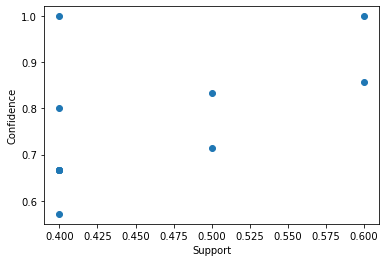

In [35]:
plt.scatter(rules5['support'],rules5['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()